In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Reading all the 2015, 2016, 2017, 2018, 2019 datasets file

In [3]:
df_2015=pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_2016=pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_2017=pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df_2018=pd.read_csv('/kaggle/input/world-happiness/2018.csv')               
df_2019=pd.read_csv('/kaggle/input/world-happiness/2019.csv')


# Show all year Shape, Lenth, Column names

In [4]:
year_list = [df_2015,df_2016,df_2017,df_2018,df_2019]
for idx,year in enumerate(year_list):
    print(2015+idx, ":\n,",year.shape, "length: ",len(year))
    print("columns:",year.columns.tolist(),'\n')

2015 :
, (158, 12) length:  158
columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2016 :
, (157, 13) length:  157
columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2017 :
, (155, 12) length:  155
columns: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 

2018 :
, (156, 9) length:  156
columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to 

In [5]:
year_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
for i in year_list:
    null_status = i.isnull().values.any()
    if null_status is True:
        print(i, "has null values")
    else:
        print(i, "doesn't have null values")


         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

# #Using pandas profiling libaray we find profiling report for research

In [6]:
!pip install pandas-profiling


In [7]:
from pandas_profiling import ProfileReport

# create the ProfileReport object for df_2015
prof = ProfileReport(df_2015)

# save the report to a file named "myoutput.html"
prof.to_file(output_file="myoutput.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis (EDA📉📈) Performance

In [8]:
df_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


(array([2., 1., 0., 0., 0., 1., 1., 2., 5., 1., 2., 4., 3., 1., 3., 6., 3.,
        5., 6., 5., 4., 7., 5., 4., 8., 3., 3., 3., 2., 1., 7., 7., 5., 5.,
        2., 1., 5., 1., 4., 3., 1., 4., 3., 4., 0., 3., 4., 2., 2., 4.]),
 array([2.839  , 2.93396, 3.02892, 3.12388, 3.21884, 3.3138 , 3.40876,
        3.50372, 3.59868, 3.69364, 3.7886 , 3.88356, 3.97852, 4.07348,
        4.16844, 4.2634 , 4.35836, 4.45332, 4.54828, 4.64324, 4.7382 ,
        4.83316, 4.92812, 5.02308, 5.11804, 5.213  , 5.30796, 5.40292,
        5.49788, 5.59284, 5.6878 , 5.78276, 5.87772, 5.97268, 6.06764,
        6.1626 , 6.25756, 6.35252, 6.44748, 6.54244, 6.6374 , 6.73236,
        6.82732, 6.92228, 7.01724, 7.1122 , 7.20716, 7.30212, 7.39708,
        7.49204, 7.587  ]),
 <BarContainer object of 50 artists>)

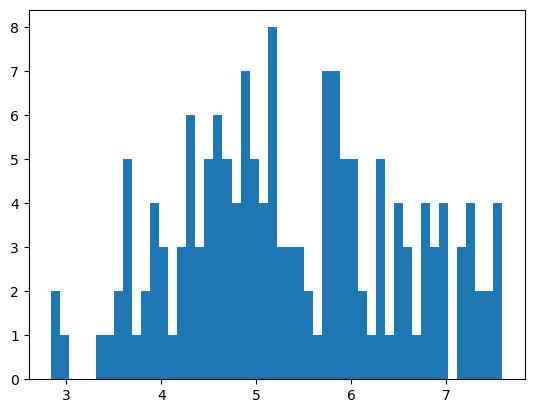

In [9]:
plt.hist(df_2015['Happiness Score'],bins=50)

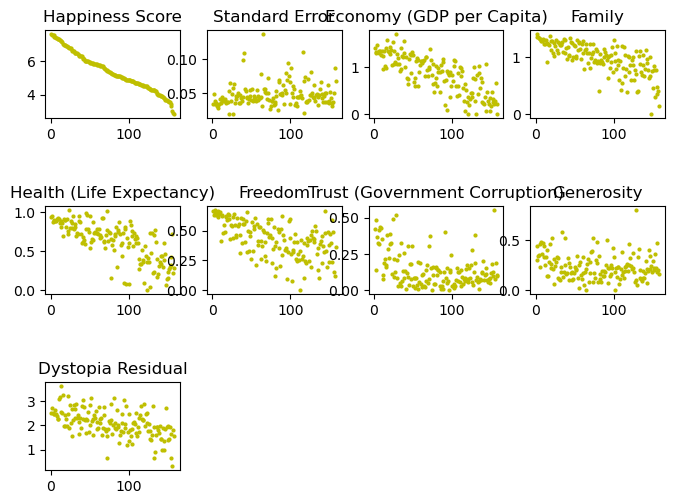

In [10]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df_2015.columns[3:]):
    x = df_2015["Happiness Rank"]
    y = df_2015[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='y',s=4)

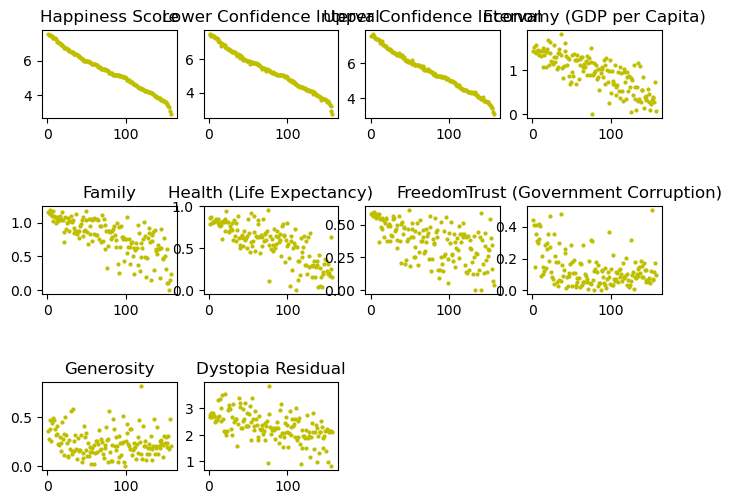

In [11]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df_2016.columns[3:]):
    x = df_2016["Happiness Rank"]
    y = df_2016[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='y',s=4)

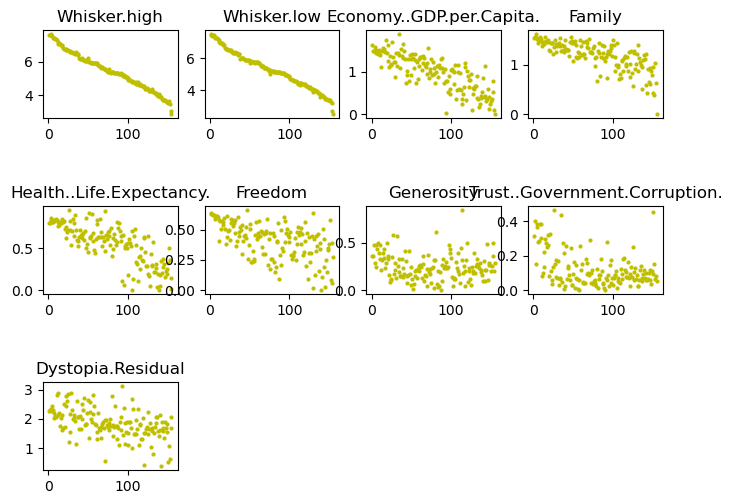

In [12]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df_2017.columns[3:]):
    x = df_2017["Happiness.Rank"]
    y = df_2017[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='y',s=4)

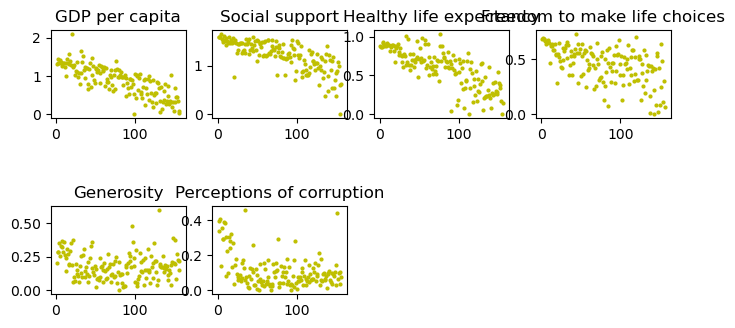

In [13]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df_2018.columns[3:]):
    x = df_2018["Overall rank"]
    y = df_2018[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='y',s=4)

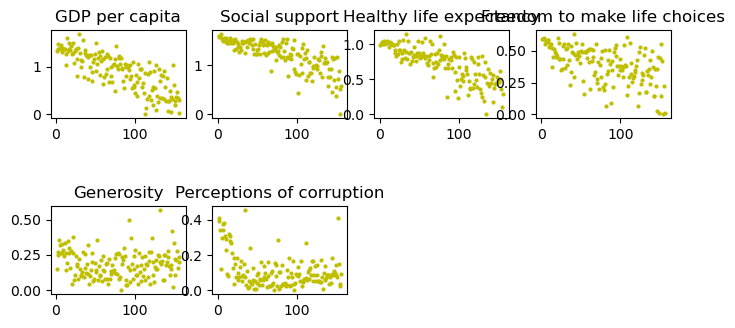

In [14]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df_2019.columns[3:]):
    x = df_2019["Overall rank"]
    y = df_2019[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='y',s=4)

In [15]:
df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


# Add Region Columns Year in 2017,2018,2019

In [16]:
df_2017.loc[:, "Region"] = ""
df_2018.loc[:, "Region"] = ""
df_2019.loc[:, "Region"] = ""
def make_region(df_year):
    for idx,country in enumerate(df_year["Country"]):
        for region2 in df_2015["Country"]:
            if country == region2:
                df_year["Region"][idx] = df_2015[df_2015["Country"]==region2]["Region"].values[0]

In [17]:
df_2018 = df_2018.rename(columns={"Country or region":"Country"},inplace=False)
df_2019 = df_2019.rename(columns={"Country or region":"Country"},inplace=False)

In [18]:
for year in [df_2017,df_2018,df_2019]:
    make_region(year)

In [19]:
df_2019.head(2)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe


# Show all years of correlation with heatmap

In [20]:
df_2015.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

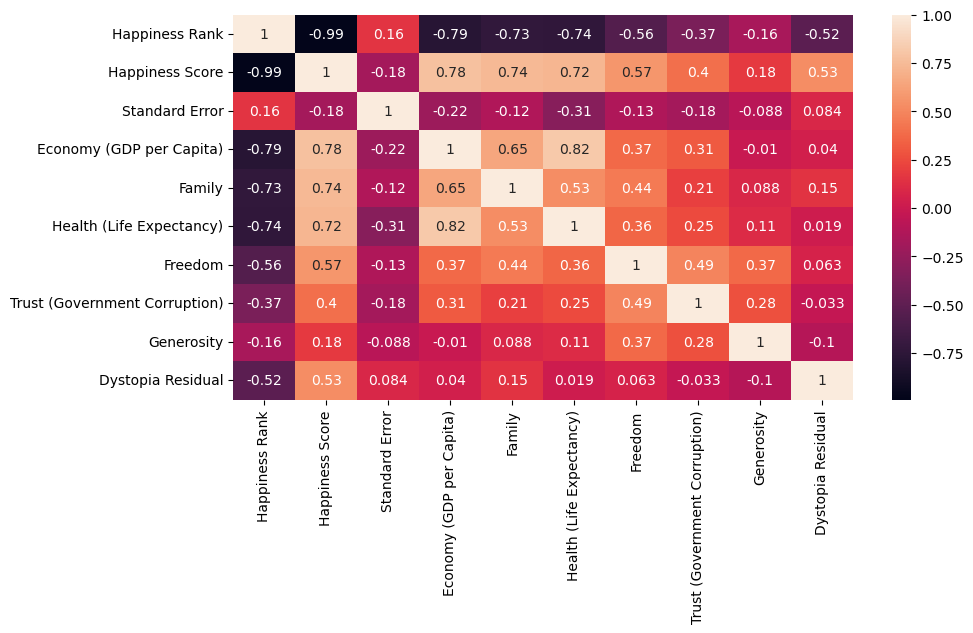

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2015.corr(), annot=True)


In [22]:
df_2016.corr()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


<AxesSubplot:>

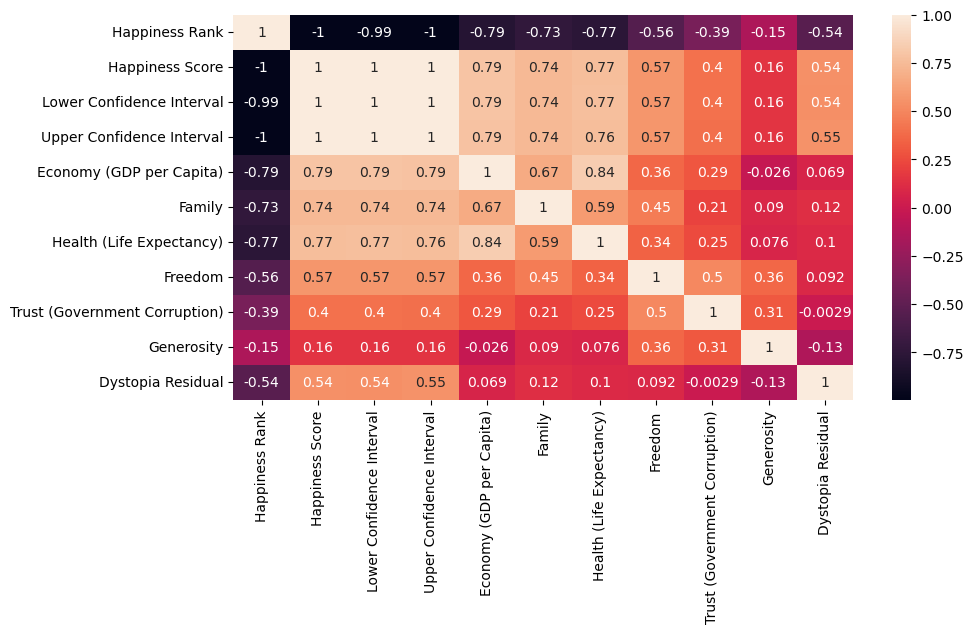

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2016.corr(), annot=True)

In [24]:
df_2017.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


<AxesSubplot:>

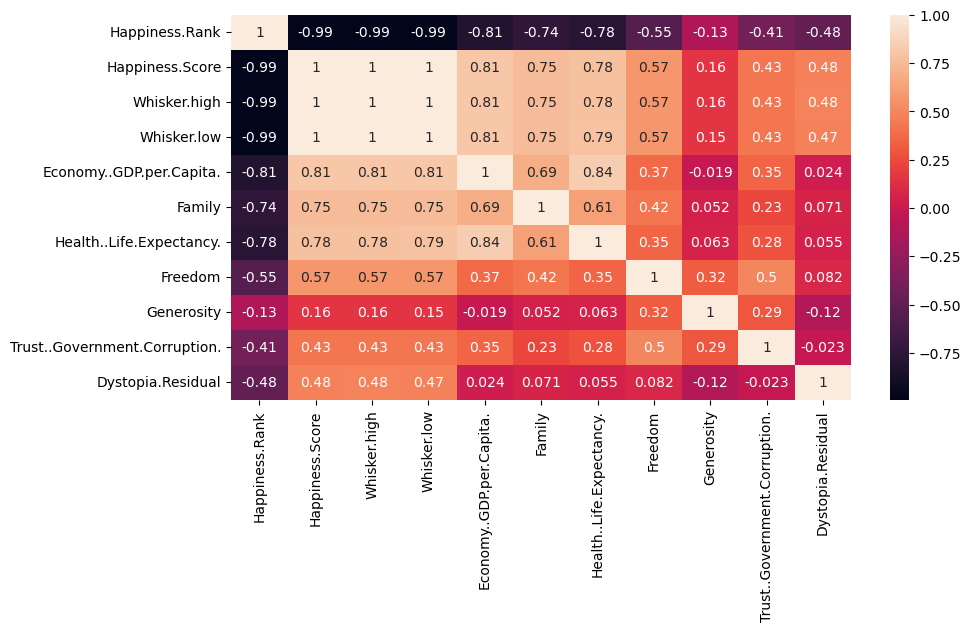

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2017.corr(), annot=True)

In [26]:
df_2018.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.371133
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.405292
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.319582
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.218364
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315569
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.462446
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362249
Perceptions of corruption,-0.371133,0.405292,0.319582,0.218364,0.315569,0.462446,0.362249,1.000000


<AxesSubplot:>

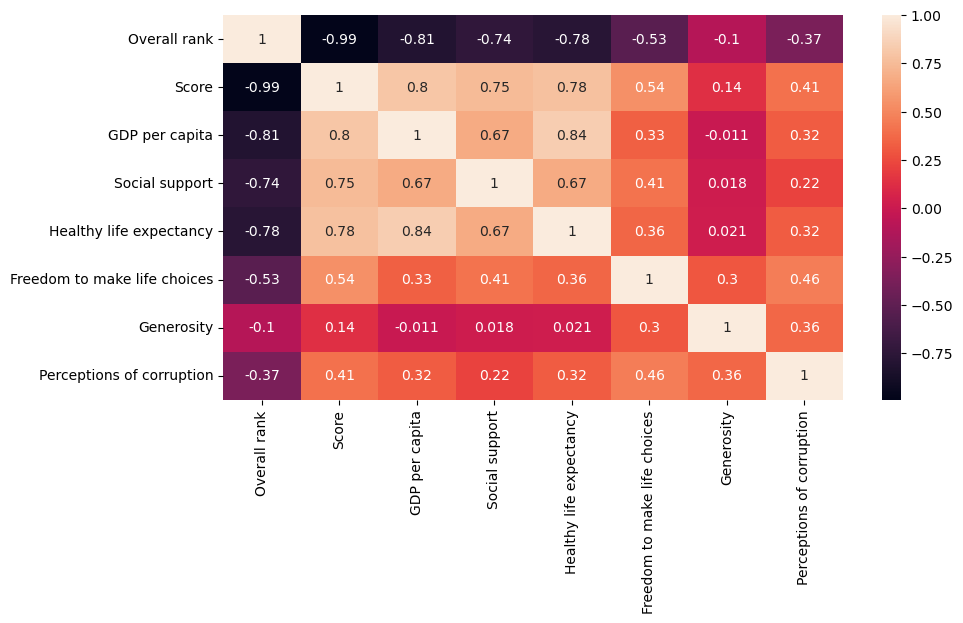

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2018.corr(), annot=True)

In [28]:
df_2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

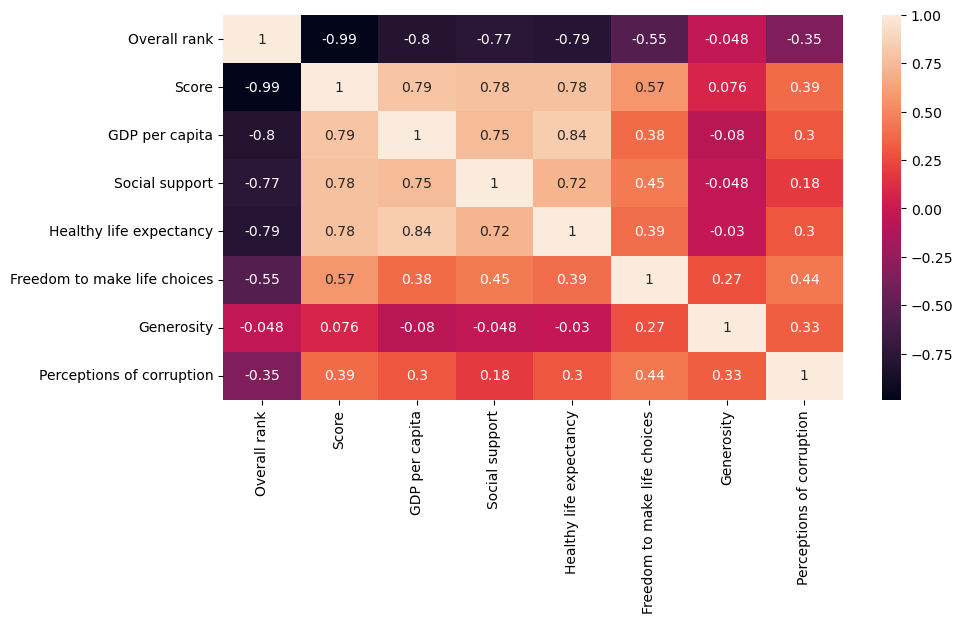

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2019.corr(), annot=True)

# 

# Creating a missing value matrix plot 

In [30]:
import missingno as msno

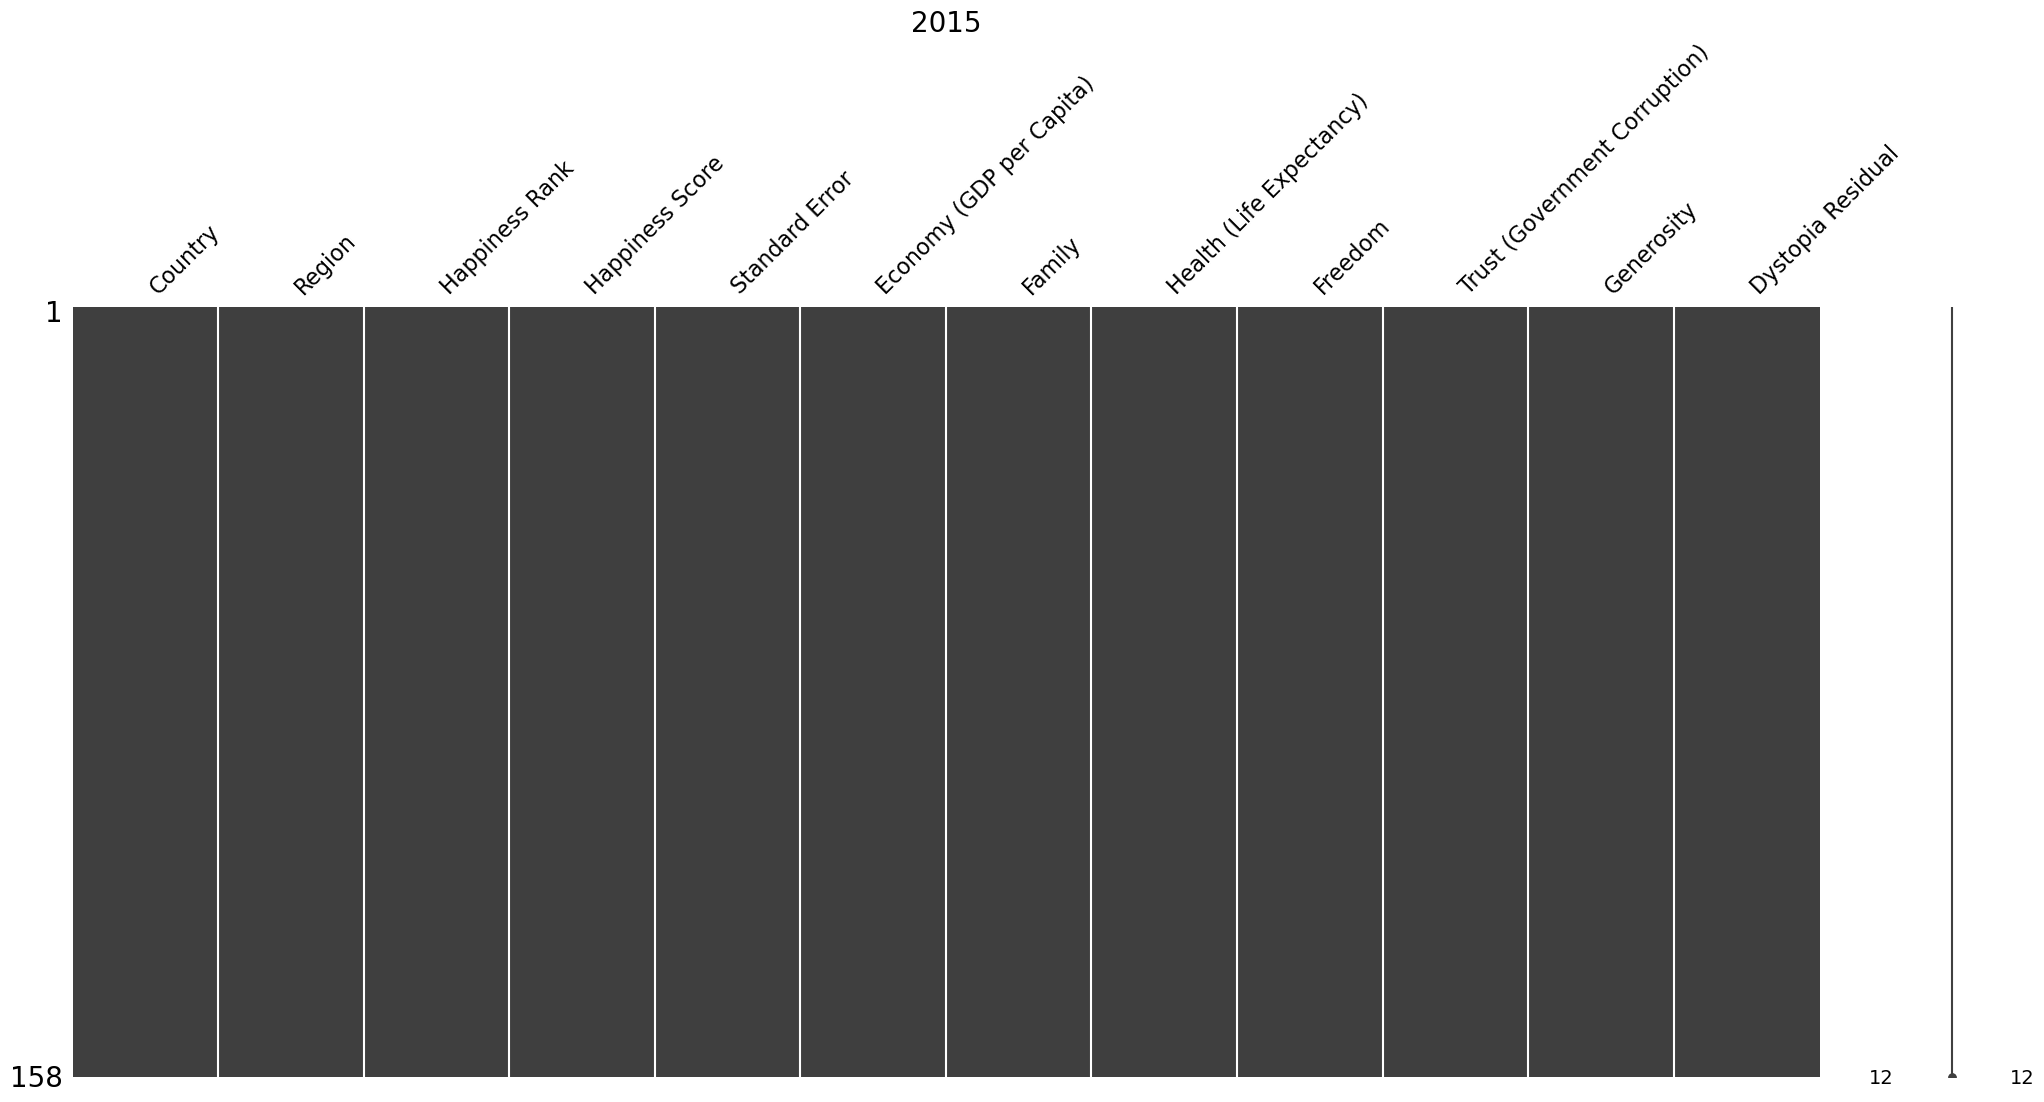

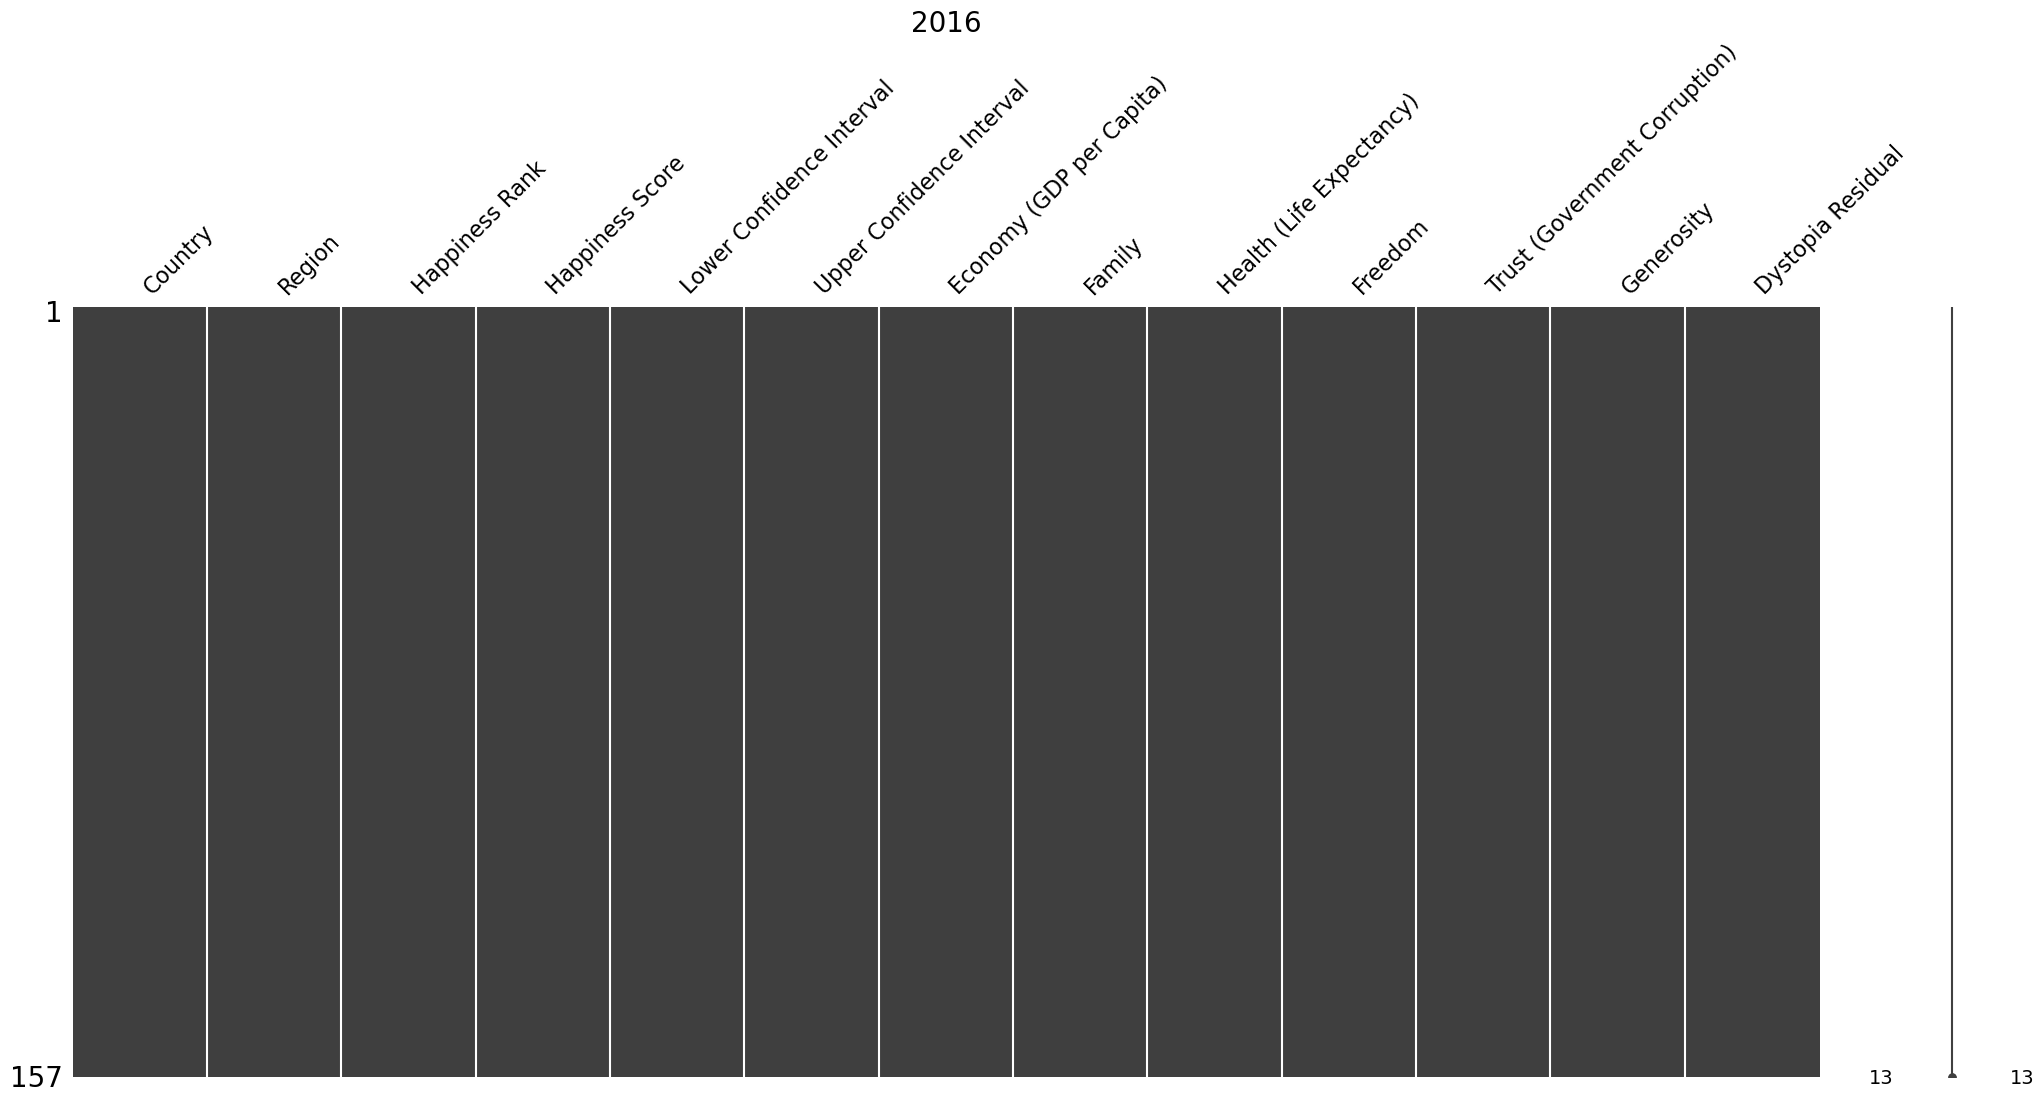

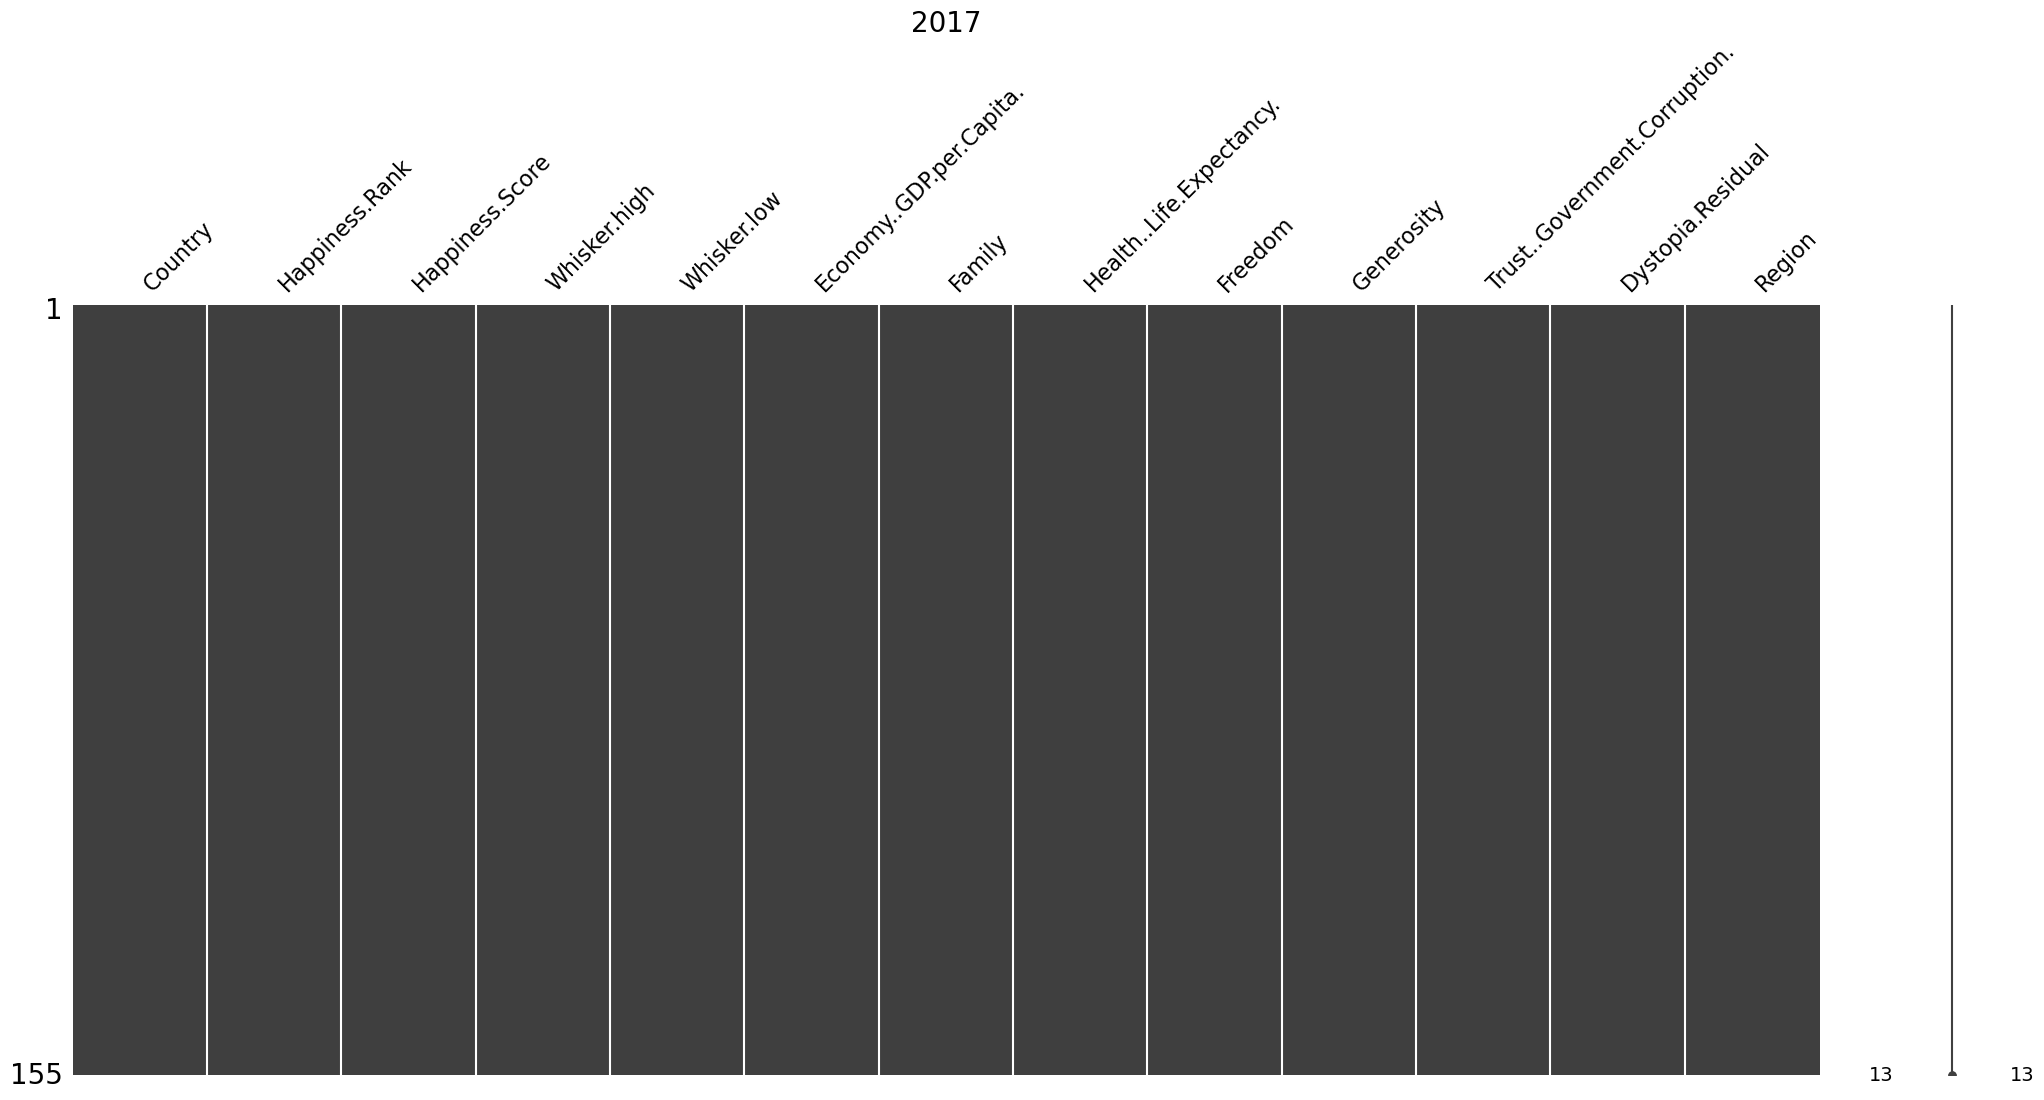

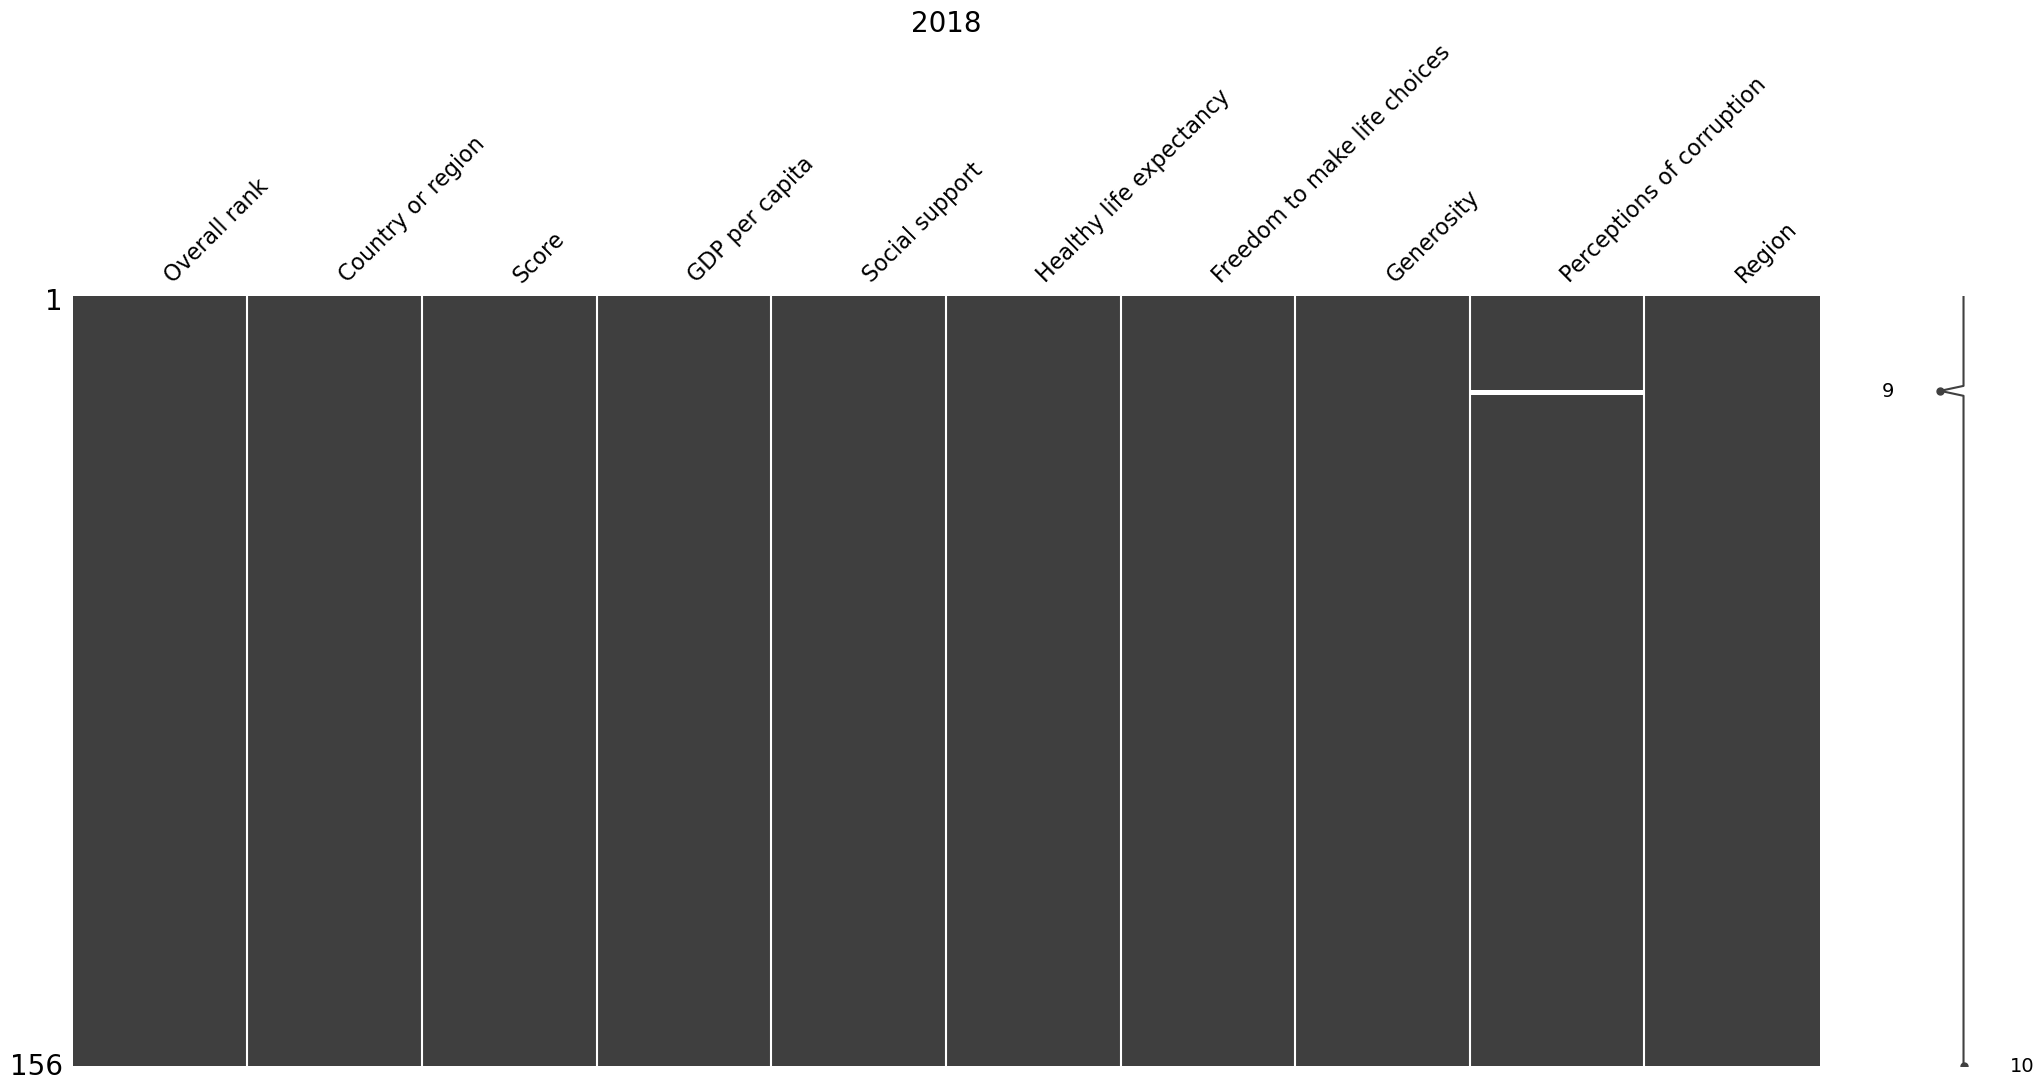

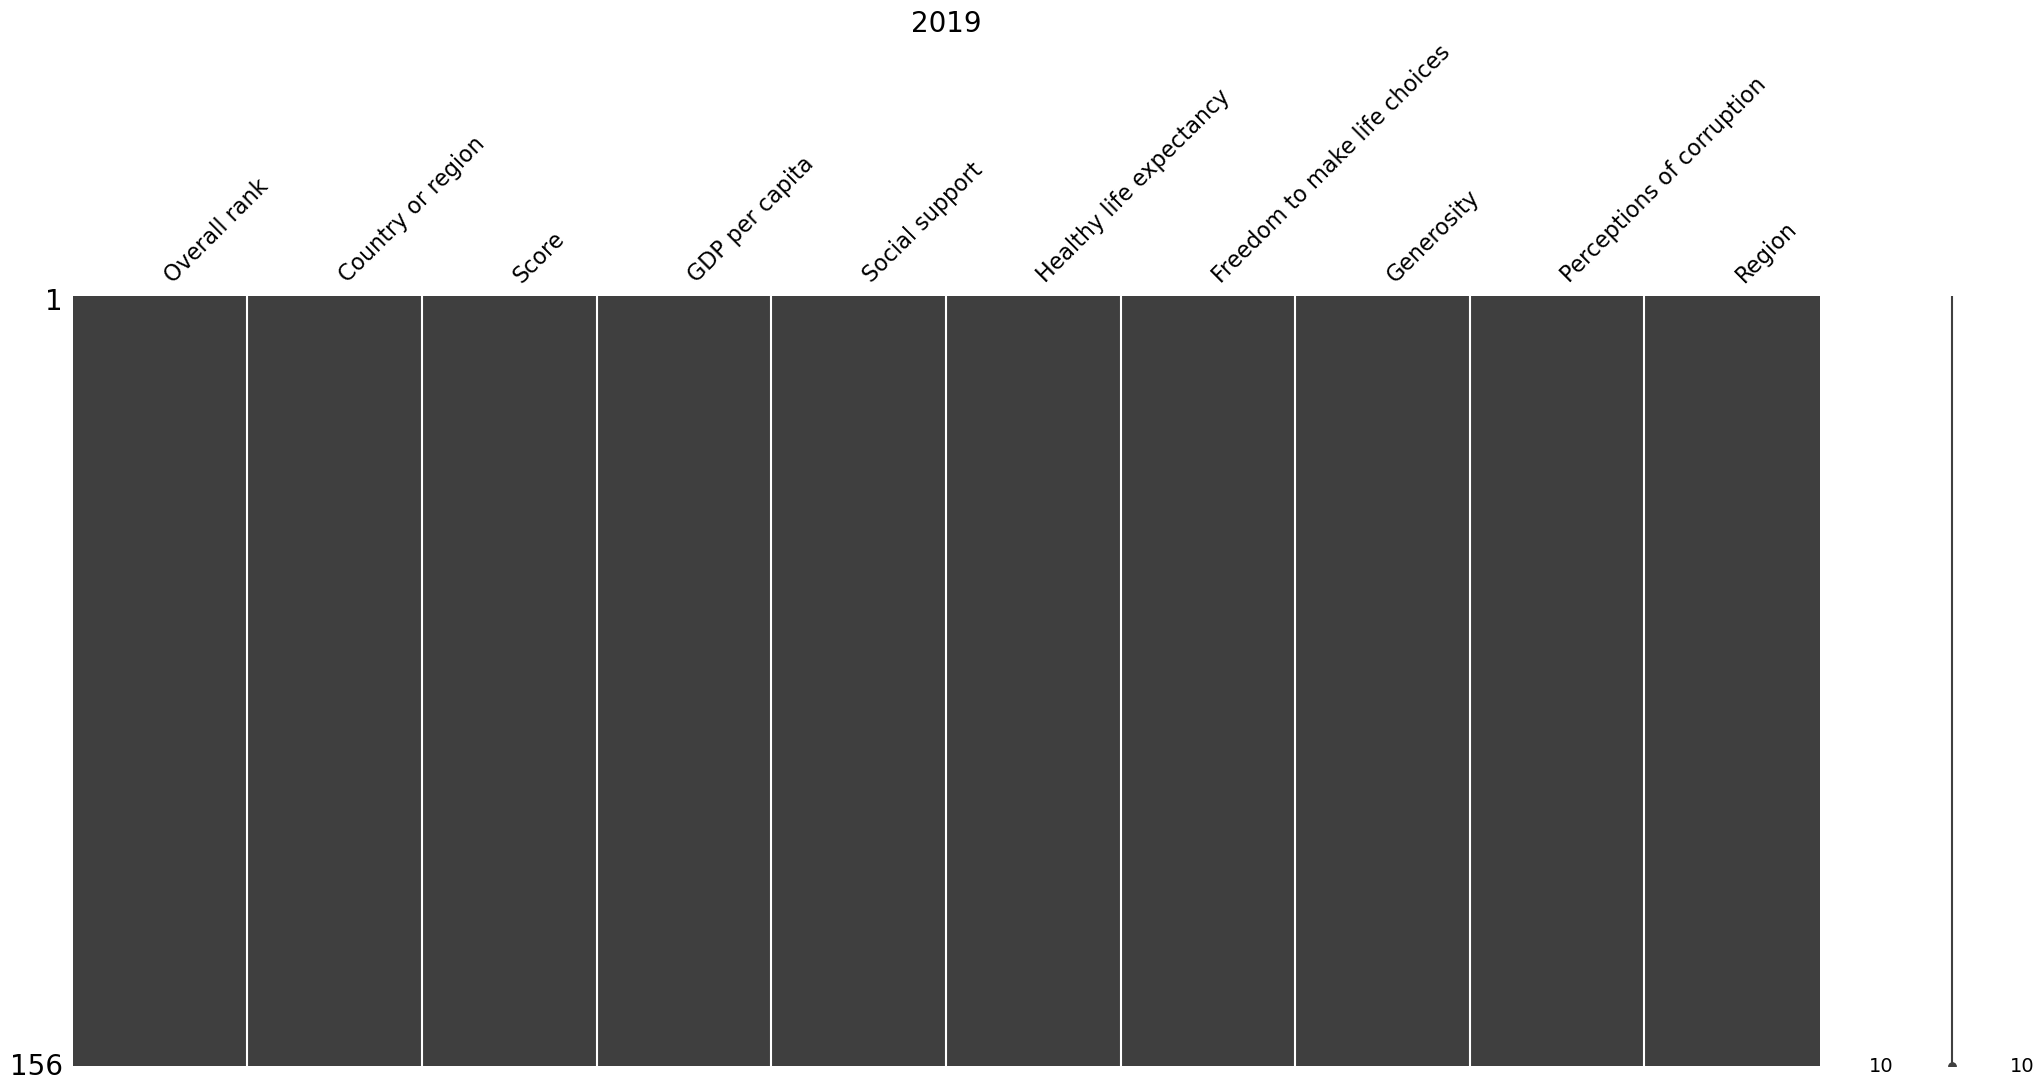

In [31]:
for idx,check in enumerate(year_list):
    msno.matrix(check)
    plt.title(idx+2015,size=20)
    plt.show()

# Fill the missing values 

In [32]:
df_2018["Perceptions of corruption"].mean()

0.112

In [33]:
df_2018["Perceptions of corruption"].fillna(0.13, inplace=True)

# Delete Unnecessary columns when we predict the result

In [34]:
for  i in ["Standard Error","Family","Dystopia Residual"]:
    df_2015 = df_2015.drop(i,axis=1)
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [35]:
df_2016 = df_2016.drop(["Lower Confidence Interval", "Upper Confidence Interval", "Family", "Dystopia Residual"], axis=1)
df_2016.head()


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


In [36]:
df_2017 = df_2017.drop(["Whisker.high","Whisker.low","Family","Dystopia.Residual"], axis=1)
df_2017.head()


,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Region
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.362012,0.315964,Western Europe
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.355280,0.400770,Western Europe
2,Iceland,3,7.504,1.480633,0.833552,0.627163,0.475540,0.153527,Western Europe
3,Switzerland,4,7.494,1.564980,0.858131,0.620071,0.290549,0.367007,Western Europe
4,Finland,5,7.469,1.443572,0.809158,0.617951,0.245483,0.382612,Western Europe


In [37]:
df_2018 = df_2018.drop(["Social support"], axis=1)
df_2018.head()


,Overall rank,Country,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.632,1.305,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,0.861,0.686,0.286,0.340,Western Europe
2,3,Denmark,7.555,1.351,0.868,0.683,0.284,0.408,Western Europe
3,4,Iceland,7.495,1.343,0.914,0.677,0.353,0.138,Western Europe
4,5,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357,Western Europe


In [38]:
df_2019 = df_2019.drop(["Social support"], axis=1)
df_2018.head()


,Overall rank,Country,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.632,1.305,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,0.861,0.686,0.286,0.340,Western Europe
2,3,Denmark,7.555,1.351,0.868,0.683,0.284,0.408,Western Europe
3,4,Iceland,7.495,1.343,0.914,0.677,0.353,0.138,Western Europe
4,5,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357,Western Europe


In [39]:
year_list = [df_2015,df_2016,df_2017,df_2018,df_2019]
for year in year_list:
    print(year.shape)

(158, 9)
(157, 9)
(155, 9)
(156, 9)
(156, 9)


# Change Columns Sequence

In [40]:
df_2017.columns = ["Country","Overall rank","Score","GDP per capita","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption","Region"]
df_2016.columns = ["Country","Region","Overall rank","Score","GDP per capita","Healthy life expectancy","Freedom to make life choices","Perceptions of corruption","Generosity"]
df_2015.columns = ["Country","Region","Overall rank","Score","GDP per capita","Healthy life expectancy","Freedom to make life choices","Perceptions of corruption","Generosity"]

In [41]:
df_2015 = df_2015[df_2019.columns.tolist()]
df_2016 = df_2016[df_2019.columns.tolist()]
df_2017 = df_2017[df_2019.columns.tolist()]
df_2018 = df_2018[df_2019.columns.tolist()]


In [42]:
if df_2015.columns.tolist() == df_2016.columns.tolist() == df_2017.columns.tolist() == df_2018.columns.tolist() == df_2019.columns.tolist():
    print("All columns are same")

All columns are same


In [43]:
# Determining feature and target samples, getting related data columns
x = df_2019["GDP per capita"].values.reshape(-1,1)
y = df_2019["Score"].values.reshape(-1,1)

# Linear Regression - Decision Tree Regression - Random Forest Regression

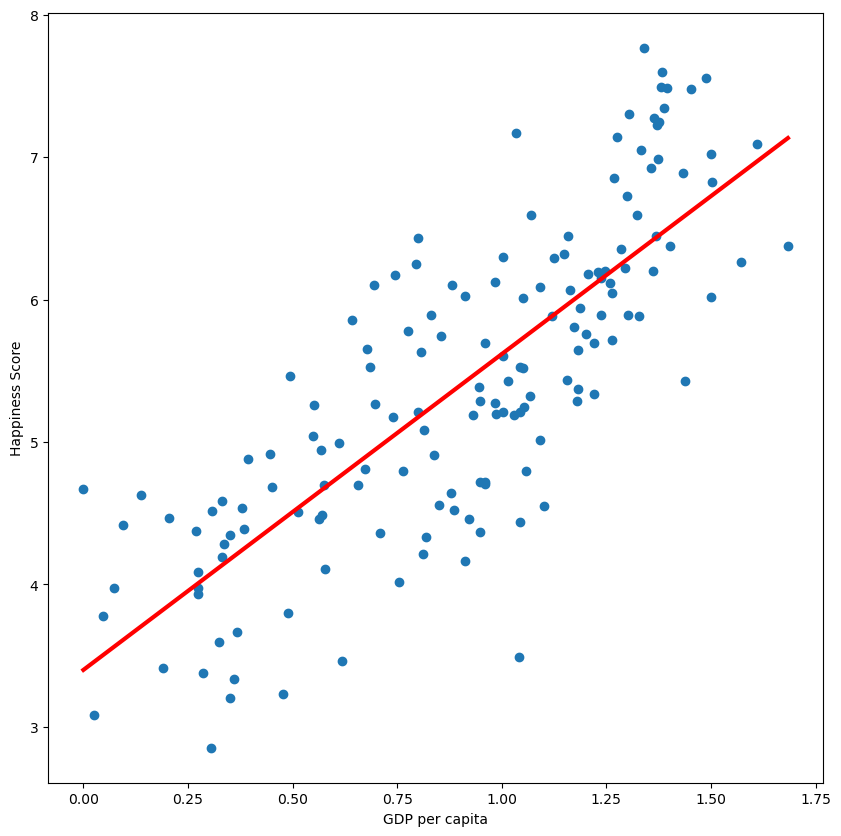

R^2 Score: 0.6302500079104005


In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(x,y)

# Prediction
x_space = np.linspace(min(x), max(x)).reshape(-1,1)
predicted_y = linear_regression_model.predict(x_space)

# Plotting regression line and scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.plot(x_space, predicted_y, color="red", linewidth=3)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.show()

# R^2 Score 
print("R^2 Score: {}".format(linear_regression_model.score(x,y)))

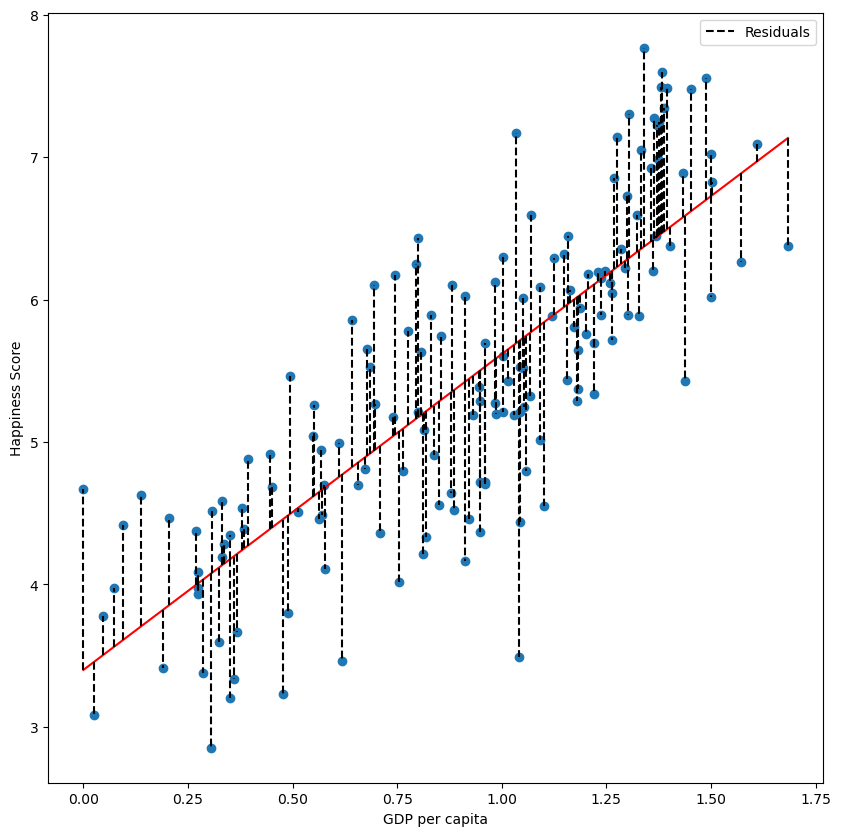

In [45]:
# Add vlines in order to show residuals
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.plot(x_space, predicted_y, color="red")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
# Set only x values ("GDP per capita") to predicting
space_for_residual = linear_regression_model.predict(x).reshape(-1,1)
plt.vlines(x, space_for_residual, y, linestyles="--", colors="black", label="Residuals")
plt.legend()
plt.show()

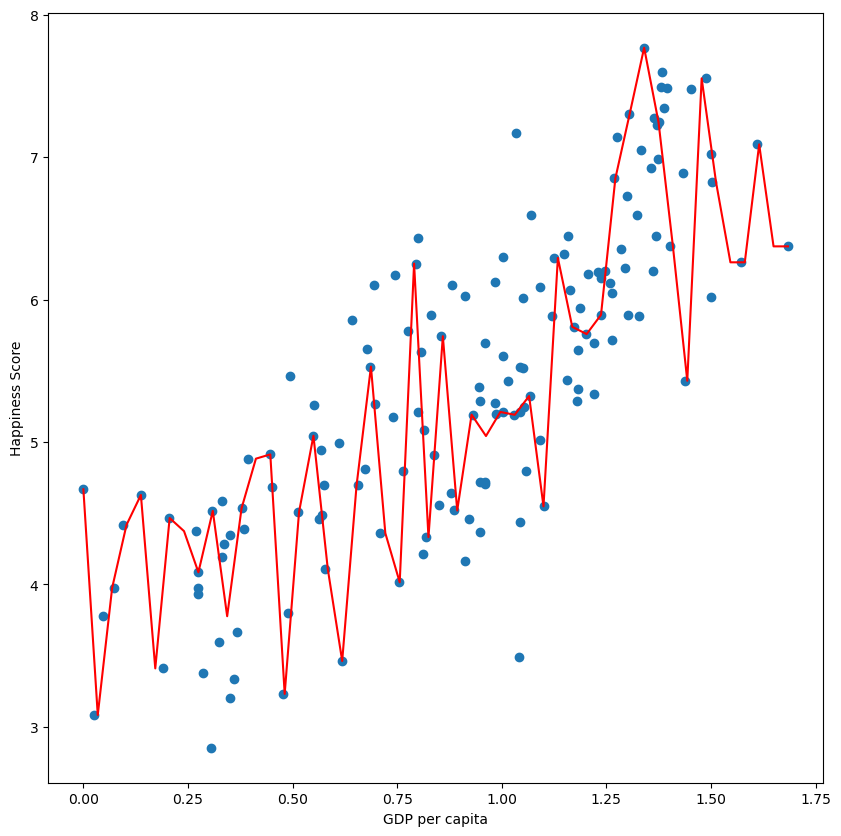

In [46]:
##Decision Tree Regression##
from sklearn.tree import DecisionTreeRegressor

tree_regression_model = DecisionTreeRegressor()
tree_regression_model.fit(x,y) 

x_space = np.linspace(min(x), max(x)).reshape(-1,1)
predicted_y = tree_regression_model.predict(x_space)

# Plotting 
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.plot(x_space, predicted_y, color="red")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.show()

# R^2 Score 

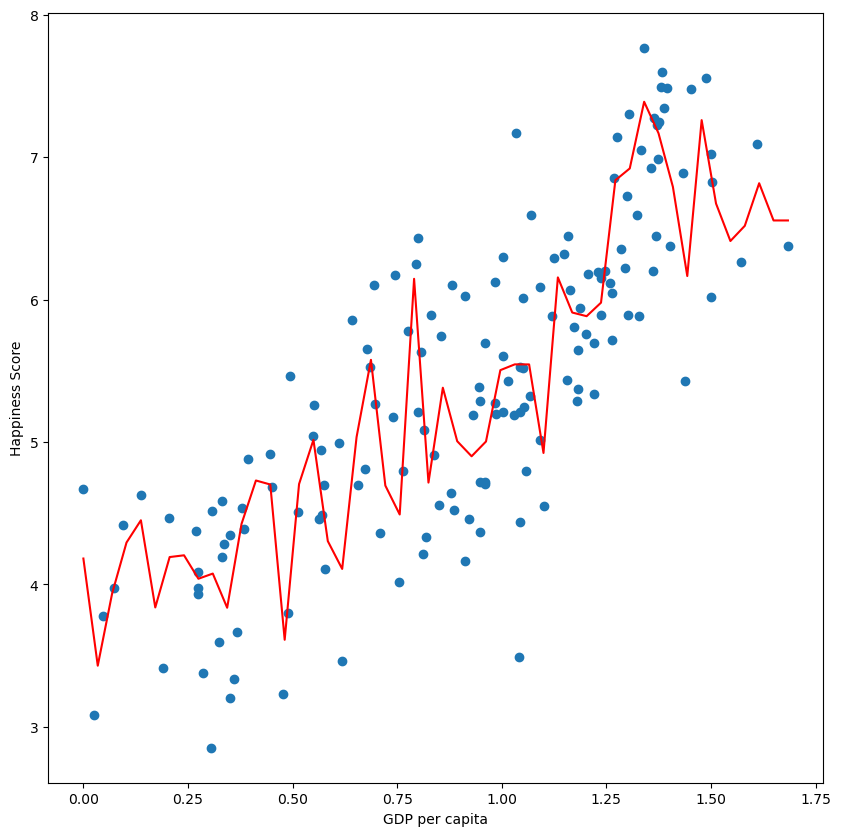

In [47]:
##Random Forest Regression##
from sklearn.ensemble import RandomForestRegressor

y_rfr = df_2019["Score"].values

random_forest_model = RandomForestRegressor(n_estimators=150, random_state=42)
random_forest_model.fit(x,y_rfr)

#Prediction
x_space = np.linspace(min(x), max(x)).reshape(-1,1)
predicted_y = random_forest_model.predict(x_space)

#Plotting
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y_rfr)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.plot(x_space, predicted_y, color="red")
plt.show()


# R^2 Score 

Regressors: LGBMRegressor